In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv', header = 0)

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [6]:
y = data[['diagnosis']]

In [7]:
X.shape

(569, 30)

Splitting data into train and test set

In [8]:
from sklearn.cross_validation import train_test_split

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
X_test.shape

(114, 30)

Using Random Forest Classifier

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)

In [13]:
clf.fit(X_train, y_train)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
clf.feature_importances_

array([  1.62975443e-02,   5.93267695e-03,   6.81547458e-03,
         1.14306885e-01,   1.05151642e-02,   2.69289653e-03,
         8.35947676e-02,   8.93237496e-02,   1.95834856e-03,
         1.10104805e-03,   1.73536563e-03,   2.61501103e-03,
         1.08707668e-02,   8.11510166e-02,   2.12401983e-03,
         3.73566547e-03,   3.69118856e-02,   3.47557710e-03,
         1.27485835e-04,   1.56021457e-03,   1.24840428e-02,
         4.71735947e-03,   1.73483756e-01,   1.72407728e-02,
         1.77725944e-02,   1.84968245e-03,   1.57869445e-02,
         2.66030229e-01,   3.02166823e-03,   1.07673860e-02])

In [15]:
np.sort(clf.feature_importances_)

array([  1.27485835e-04,   1.10104805e-03,   1.56021457e-03,
         1.73536563e-03,   1.84968245e-03,   1.95834856e-03,
         2.12401983e-03,   2.61501103e-03,   2.69289653e-03,
         3.02166823e-03,   3.47557710e-03,   3.73566547e-03,
         4.71735947e-03,   5.93267695e-03,   6.81547458e-03,
         1.05151642e-02,   1.07673860e-02,   1.08707668e-02,
         1.24840428e-02,   1.57869445e-02,   1.62975443e-02,
         1.72407728e-02,   1.77725944e-02,   3.69118856e-02,
         8.11510166e-02,   8.35947676e-02,   8.93237496e-02,
         1.14306885e-01,   1.73483756e-01,   2.66030229e-01])

In [16]:
feat_labels = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [20]:
importances = clf.feature_importances_
importances

array([  1.62975443e-02,   5.93267695e-03,   6.81547458e-03,
         1.14306885e-01,   1.05151642e-02,   2.69289653e-03,
         8.35947676e-02,   8.93237496e-02,   1.95834856e-03,
         1.10104805e-03,   1.73536563e-03,   2.61501103e-03,
         1.08707668e-02,   8.11510166e-02,   2.12401983e-03,
         3.73566547e-03,   3.69118856e-02,   3.47557710e-03,
         1.27485835e-04,   1.56021457e-03,   1.24840428e-02,
         4.71735947e-03,   1.73483756e-01,   1.72407728e-02,
         1.77725944e-02,   1.84968245e-03,   1.57869445e-02,
         2.66030229e-01,   3.02166823e-03,   1.07673860e-02])

In [22]:
indices = np.argsort(importances)[::-1]

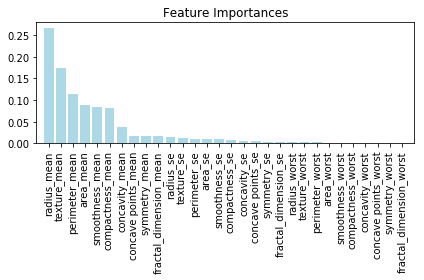

In [23]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Using RandomForestClassifier to classify the test set

In [26]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
confusion_matrix(y_test, y_pred, labels=None)

array([[69,  2],
       [ 4, 39]])

### Accuracy for Random Forest turns out to be 94%

In [31]:
accuracy_score(y_test, y_pred)

0.94736842105263153

Trying with top 6 most informative features

In [32]:
X_train_mod = X_train[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']]
X_test_mod = X_test[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']]

In [33]:
clf = RandomForestClassifier(n_estimators=10, max_depth=7, n_jobs=-1)
train_history = clf.fit(X_train_mod, y_train)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


<bound method BaseForest.decision_path of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [36]:
y_pred_mod = clf.predict(X_test_mod)

In [37]:
confusion_matrix(y_test, y_pred_mod)

array([[66,  5],
       [ 6, 37]])

The accuracy dropped by 4% after reducing to only six features

In [38]:
accuracy_score(y_test, y_pred_mod)

0.90350877192982459

### Lets see how other classification algorithms perform

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [41]:
classifier = KNeighborsClassifier(n_neighbors=5)

Using Grid Search to find the best set of parameters

In [46]:
grid = GridSearchCV(classifier, param_grid={'n_neighbors':list(np.arange(1,20)), 'weights':['uniform', 'distance']}, cv=5, scoring='accuracy')

In [47]:
grid.fit(X_train_mod, y_train)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packa

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packa

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packa

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packa

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packa

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
grid.grid_scores_

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86593, std: 0.02115, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.86593, std: 0.02115, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.85934, std: 0.02547, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.86593, std: 0.02115, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.87912, std: 0.02088, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.88132, std: 0.02547, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.88791, std: 0.03677, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.88571, std: 0.02283, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.88352, std: 0.03334, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.88791, std: 0.03518, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.88571, std: 0.03639, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.89011, std: 0.04078, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.87692, std: 0.03407, para

### Accuracy with KNN goes to 90%

In [49]:
grid.best_score_

0.90109890109890112

In [50]:
grid.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [73]:
mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
mean_scores

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[0.86593406593406597,
 0.86593406593406597,
 0.85934065934065929,
 0.86593406593406597,
 0.87912087912087911,
 0.8813186813186813,
 0.88791208791208787,
 0.88571428571428568,
 0.88351648351648349,
 0.88791208791208787,
 0.88571428571428568,
 0.89010989010989006,
 0.87692307692307692,
 0.89010989010989006,
 0.88351648351648349,
 0.89010989010989006,
 0.87912087912087911,
 0.89450549450549455,
 0.88791208791208787,
 0.89230769230769236,
 0.89010989010989006,
 0.89670329670329674,
 0.89230769230769236,
 0.90109890109890112,
 0.89230769230769236,
 0.89670329670329674,
 0.89230769230769236,
 0.89670329670329674,
 0.89010989010989006,
 0.89670329670329674,
 0.89230769230769236,
 0.89230769230769236,
 0.89010989010989006,
 0.89450549450549455,
 0.89010989010989006,
 0.89230769230769236,
 0.89010989010989006,
 0.89890109890109893]

In [75]:
inds1 = np.arange(0,37,2)
mean_scores_wt1 = [mean_scores[i] for i in inds1]
inds2 = np.arange(1,37,2)
mean_scores_wt2 = [mean_scores[i] for i in inds2]
mean_scores_wt2

[0.86593406593406597,
 0.86593406593406597,
 0.8813186813186813,
 0.88571428571428568,
 0.88791208791208787,
 0.89010989010989006,
 0.89010989010989006,
 0.89010989010989006,
 0.89450549450549455,
 0.89230769230769236,
 0.89670329670329674,
 0.90109890109890112,
 0.89670329670329674,
 0.89670329670329674,
 0.89670329670329674,
 0.89230769230769236,
 0.89450549450549455,
 0.89230769230769236]

Text(0.5,0,'Value of k')

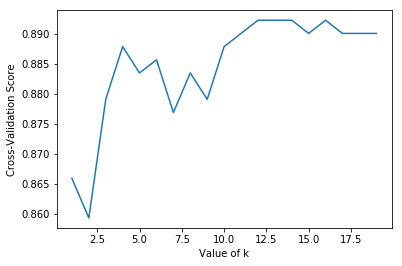

In [78]:
plt.plot(list(np.arange(1,20)), mean_scores_wt1)
plt.ylabel('Cross-Validation Score')
plt.xlabel('Value of k')

In [51]:
classifier = KNeighborsClassifier(n_neighbors=12, weights='distance')
train_history = classifier.fit(X_train_mod, y_train)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [55]:
y_pred = classifier.predict(X_test_mod)

In [56]:
confusion_matrix(y_test, y_pred)

array([[66,  5],
       [ 9, 34]])

In [57]:
accuracy_score(y_test, y_pred)

0.8771929824561403

Adding more features to the current set and checking accuracy

In [79]:
X_train_mod = X_train[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean']]
X_test_mod = X_test[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]

In [80]:
train_history = classifier.fit(X_train_mod, y_train)
y_pred = classifier.predict(X_test_mod)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [81]:
confusion_matrix(y_test, y_pred)

array([[66,  5],
       [ 9, 34]])

Adding more parameters clearly didn't help us.

In [82]:
accuracy_score(y_test, y_pred)

0.8771929824561403

In [83]:
from sklearn import svm

In [84]:
clf = svm.SVC()

In [85]:
clf.fit(X_train_mod, y_train)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
y_pred = clf.predict(X_test_mod)

In [88]:
accuracy_score(y_test, y_pred)

0.66666666666666663

### Linear Kernel out performed the RBF Kernel

In [90]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_mod, y_train)
y_pred = clf.predict(X_test_mod)
accuracy_score(y_test, y_pred)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.90350877192982459